<a href="https://colab.research.google.com/github/marixko/workshop_pyladies/blob/master/tutorial_anotado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **WORKSHOP INTRODUÇÃO À MACHINE LEARNING**

**Autoria**: Lilianne M. I. Nakazono | **Organização**: Pyladies SP | **Local**: FIAP Paulista <br>


---



Olá meninas!

Hoje iremos usar (principalmente) os seguintes pacotes:
* [Pandas](https://pandas.pydata.org/) - Leitura a manipulação de dados tabulares 
* [Seaborn](https://seaborn.pydata.org/) - Visualização de dados 
* [Sklearn](https://scikit-learn.org/stable/index.html) - Algoritmos de aprendizado de máquina


Este arquivo já contém alguns códigos pra facilitar a vida. Rodem todas as células antes de começar a escrever seu próprio código.




# 1. Bibliotecas

In [0]:
# Importando bibliotecas:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import itertools
from sklearn import metrics

# 2. Funções

In [0]:
# Definindo funções:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.3f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# 3. Leitura de dados

## Iris dataset

In [0]:
target = pd.DataFrame(datasets.load_iris().target, columns=['target'])
iris = pd.DataFrame(datasets.load_iris().data, columns=datasets.load_iris().feature_names) 

# 4. Pré-análise dos dados

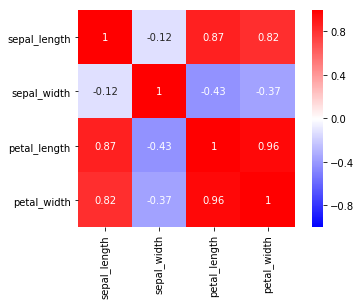

In [35]:
target
iris

# lista nome das colunas:
list(iris)
# muda nome das colunas:
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
#checa tipo de cada coluna:
iris.dtypes

# checa se tem NaNs
iris.isna().sum()
# retira linhas com NaNs
iris = iris.dropna()

# estatisticas:
iris.describe().T
iris.sepal_length.mean() #média

# acessando linhas/colunas:
iris.iloc[0:5,:]
iris.head(4)
iris.iloc[:,0]

# iris.hist(bins=20)
# plt.show()

data = pd.concat([iris,target], axis=1)
# sns.pairplot(data, hue='target')

#filtrando a tabela segundo determinadas condições
iris_2 = iris.query('petal_length>1 & petal_width>1 & sepal_length>1 & sepal_width>1')
# iris_2 = iris[(iris.petal_length>1) & (iris.petal_width>1) & (iris.sepal_length>1) & (iris.sepal_width>1)]

# acessa por label:
iris_2.loc[50:52,:]

# acessa por posição
iris_2.iloc[0:3,]

# nova tabela com apenas algumas colunas:
petal = iris[['petal_length', 'petal_width']]
petal

#matriz de correlação:
iris.corr()
sns.heatmap(iris.corr(), cmap='bwr', vmax=1, vmin=-1, center=0, square=True, annot=True)

Imprimir tabela: 

> `print(iris)`

Contagem de linhas para um certo atributo:

> `iris.atributo.value_counts()`


Tipo dos atributos:

> `iris.dtypes`

Nome dos atributos (colunas):

> `list(iris)`

Estatísticas:

> `iris.describe().T`

Média de um atributo:

> `iris.atributo.mean()`

Desvio padrão de um atributo:

> `iris.atributo.std()`

Concatenar linhas/colunas:

> `iris.concat()`

Checar se tem NaNs:

> `iris.isna().sum()`

Remover NaNs:

> `iris.dropna()`

Acessar todas as colunas da linha em posição i: 

> `iris.iloc[i,:]`

Acessar todas as colunas da linha de índice i:

> `iris.loc[i,:]`

Filtrando tabela:

> `iris.query('condição1 & condição2')`


> `iris[(condição1) & (condição2)]`

Histograma:

> `iris.hist()`

Pairplot: 

> `sns.pairplot(data, hue="target")` <br> # data contém uma coluna chamada target com as classes

Matriz de correlação:

> `iris.corr()`

Visualização matriz de correlação:
> `sns.heatmap(iris.corr(), cmap='bwr', vmax=1, vmin=-1,center=0, square=True, annot=True)`


# 5. Amostragem para validação cruzada

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    iris, target, test_size = 0.3, random_state = 2)


,sepal_length,sepal_width,petal_length,petal_width
134,6.1,2.6,5.6,1.4
28,5.2,3.4,1.4,0.2
65,6.7,3.1,4.4,1.4
0,5.1,3.5,1.4,0.2
27,5.2,3.5,1.5,0.2
36,5.5,3.5,1.3,0.2
106,4.9,2.5,4.5,1.7
148,6.2,3.4,5.4,2.3
131,7.9,3.8,6.4,2.0
20,5.4,3.4,1.7,0.2


Criando amostra de treinamento (70%) e de teste (30%):
> `X_train, X_test, y_train, y_test = train_test_split(iris, target,  test_size=0.3, random_state=42)`

Para fazer uma amostragem estratificada, adicionar o parâmetro:

> `stratify = target`

# 6. Validação de modelo

In [42]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train.values.ravel())

y_pred = clf.predict(X_test)

# matrix = confusion_matrix(y_test, y_pred)
# fig = plot_confusion_matrix(matrix, 
#                     classes=['0', '1', '2'])
# plt.show()

print(metrics.classification_report
      (y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



## Algoritmos:

Eu recomendo fortemente que vocês procurem a documentação de cada algoritmo e deem uma lida nos parâmetros pedidos de cada um! 

k-Nearest Neighbors: 

> `clf = KNeighborsClassifier()`

Support Vector Machine:

> `clf = SVC()`

Decision Tree:

> `clf = DecisionTreeClassifier()`

Random Forest: 

> `clf = RandomForestClassifier()`

## Treinamento do modelo:

> `clf.fit(X_train, y_train.values.ravel())`

## Teste:

> `y_pred = clf.predict(X_test)`

## Matriz de confusão: 
> `matrix = confusion_matrix(y_test, y_pred)`

> `fig = plot_confusion_matrix(matrix, classes=['0','1', '2'])`

## Métricas de performance:

> `metrics.classification_report(y_test, y_pred)`
